In [4]:
!pip install pandas openpyxl faker

     ---------------------------------------- 1.8/1.8 MB 10.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import openpyxl
from faker import Faker

# Initialize a Faker generator
fake = Faker()

# Load the Excel file
file_path = 'Student Performance.xlsx'  # Update with the path to your file
student_data = pd.read_excel(file_path, engine='openpyxl')

# Generate fake names and IDs
student_data['Student ID'] = [fake.unique.random_int(min=1000, max=9999) for _ in range(len(student_data))]
student_data['Name'] = [fake.name() for _ in range(len(student_data))]

# Save the modified data back to an Excel file
student_data.to_excel('Modified_Student_Performance.xlsx', index=False)


The dataset contains 7 columns: 
'ID NO.', 'Name', 'Lab Exam 1 Marks(30)', 'Lab Exam 2 Marks(30)', 'Lab Exam 3 Marks(30)', 'Best of 2 Total(60)', and 'Percentage of Marks'.

In [6]:
# Load the modified student performance data
modified_data_path = 'Modified_Student_Performance.xlsx'
modified_student_data = pd.read_excel(modified_data_path)

# Display the first few rows to understand the structure
print(modified_student_data.head())

# Display a summary of the data types and missing values
print(modified_student_data.info())

# Check basic statistics to understand distributions
print(modified_student_data.describe())

# We will also check for the presence of any missing values
print(modified_student_data.isnull().sum())


   ID NO.                    Name Lab Exam 1 Marks(30) Lab Exam 2 Marks(30)  \
0     5681          Ashley Romero                   26                   30   
1     9479          Vanessa Moore                   22                   22   
2     6984             James Wang                   27                   28   
3     5575        Christine Brown                    9                   22   
4     3952  Dr. Timothy Patton MD                   AB                   24   

  Lab Exam 3 Marks(30)  Best of      2 Total(60)   Percentage\n of Marks  
0                   AB                         56              93.333333  
1                    9                         44              73.333333  
2                   20                         55              91.666667  
3                   10                         32              53.333333  
4                    9                         33              55.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data 

- Number of Entries: There are 43 entries in the dataset.
- Columns: The dataset contains 7 columns: 'ID NO.', 'Name', 'Lab Exam 1 Marks(30)', 'Lab Exam 2 Marks(30)', 'Lab Exam 3 Marks(30)', 'Best of 2 Total(60)', and 'Percentage of Marks'.
- Missing Values: There are no null entries in any of the columns, which means there are no missing values to handle. However, it appears that some marks are denoted by 'AB', which indicate absence.
- Data Types: The lab exam marks are currently object types due to the presence of non-numeric entries (like 'AB'). These need to be converted to numeric types for analysis.
- Descriptive Statistics:
    - Best of 2 Total (60): The mean score is approximately 39.14 out of 60, with a standard deviation of around 11.91, indicating moderate variability in scores.
    - Percentage of Marks: The mean percentage is approximately 65.23%, with a standard deviation of around 19.85%, and values ranging from 16.67% to 100%.

### Next steps for analysis include:

- Cleaning: Convert the lab exam marks from object to numeric, handling 'AB' as missing or zero, depending on the context.
- Feature Engineering: Calculate the total marks and overall percentage if necessary.
- Statistical Analysis: Explore mean, median, mode, and standard deviation in more detail.
- Visualization: Create histograms and boxplots for the distribution of marks and percentages.

# Data Cleaning

In [8]:
# Handle 'AB' entries and convert exam mark columns to numeric
# We will assume 'AB' stands for 'Absent' and will be treated as missing values
import numpy as np
# Columns with marks
marks_columns = ['Lab Exam 1 Marks(30)', 'Lab Exam 2 Marks(30)', 'Lab Exam 3 Marks(30)']

# Replace 'AB' with NaN and convert columns to numeric
for column in marks_columns:
    modified_student_data[column] = pd.to_numeric(modified_student_data[column].replace('AB', np.nan), errors='coerce')

# Recalculate 'Best of 2 Total(60)' as it might be affected by the 'AB' entries
# We will fill NaN values with 0 for this purpose, assuming an absence is scored as 0
modified_student_data[marks_columns] = modified_student_data[marks_columns].fillna(0)
modified_student_data['Best of 2 Total(60)'] = modified_student_data[marks_columns].apply(lambda x: x.nlargest(2).sum(), axis=1)

# Recalculate 'Percentage of Marks' based on the new 'Best of 2 Total(60)'
modified_student_data['Percentage\n of Marks'] = (modified_student_data['Best of 2 Total(60)'] / 60) * 100

# Display updated DataFrame and the description of the numeric columns
print(modified_student_data.head())
print(modified_student_data[marks_columns + ['Best of 2 Total(60)', 'Percentage\n of Marks']].describe())


   ID NO.                    Name  Lab Exam 1 Marks(30)  Lab Exam 2 Marks(30)  \
0     5681          Ashley Romero                  26.0                  30.0   
1     9479          Vanessa Moore                  22.0                  22.0   
2     6984             James Wang                  27.0                  28.0   
3     5575        Christine Brown                   9.0                  22.0   
4     3952  Dr. Timothy Patton MD                   0.0                  24.0   

   Lab Exam 3 Marks(30)  Best of      2 Total(60)   Percentage\n of Marks  \
0                   0.0                         56              93.333333   
1                   9.0                         44              73.333333   
2                  20.0                         55              91.666667   
3                  10.0                         32              53.333333   
4                   9.0                         33              55.000000   

   Best of 2 Total(60)  
0                 56.0  


- The marks previously recorded as 'AB' have been considered as absences and converted to 0 for the purpose of analysis.
- The average marks across the lab exams vary, with lab exam 1 averaging around 11.91, lab exam 2 around 22.12, and lab exam 3 approximately 13.19 out of 30.
- Standard deviation values indicate variability, with lab exam 1 having the most significant variation.
- The 'Best of 2 Total(60)' and 'Percentage of Marks' have been recalculated based on the new scores.

The descriptive statistics now show:

- A mean 'Best of 2 Total(60)' score of approximately 39.14, indicating that on average, students are scoring just over 65% when considering their best two lab exams.
- The standard deviation for the 'Best of 2 Total(60)' is around 11.91, showing moderate variability in these adjusted scores.

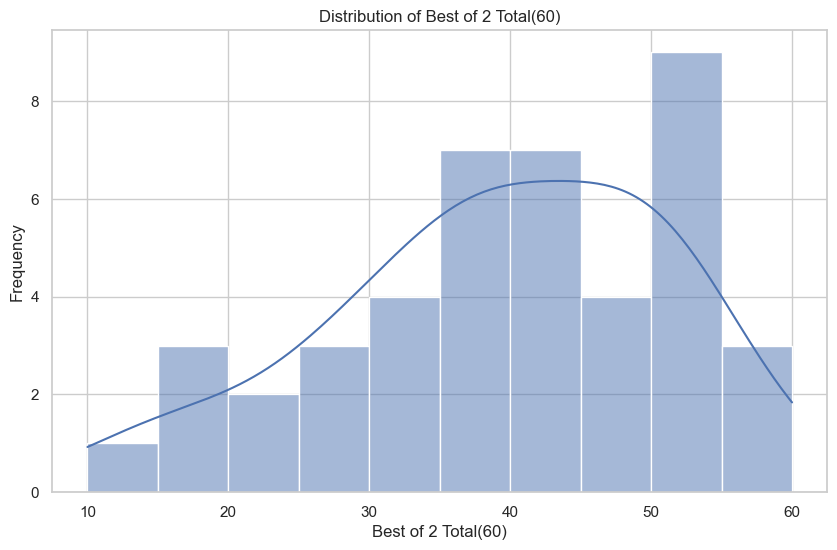

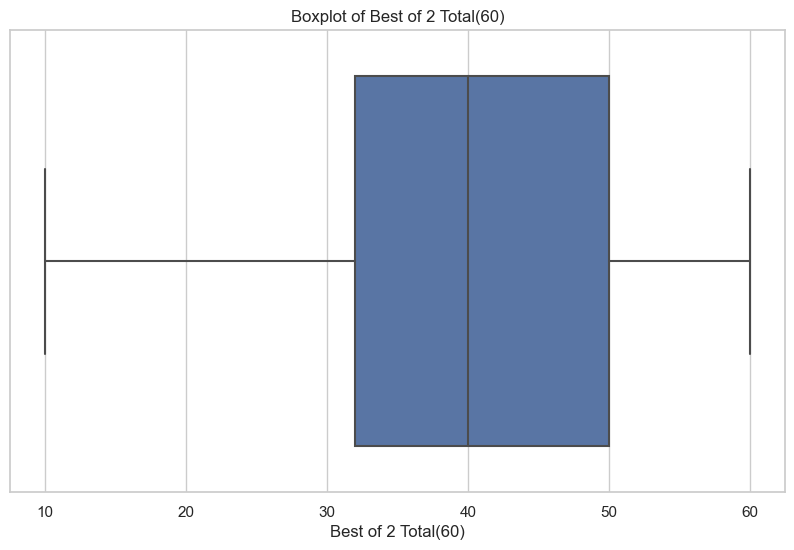

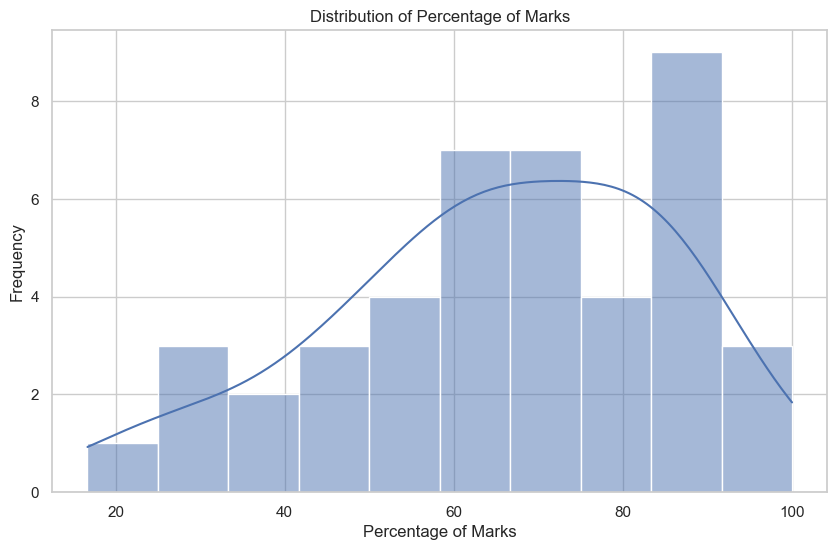

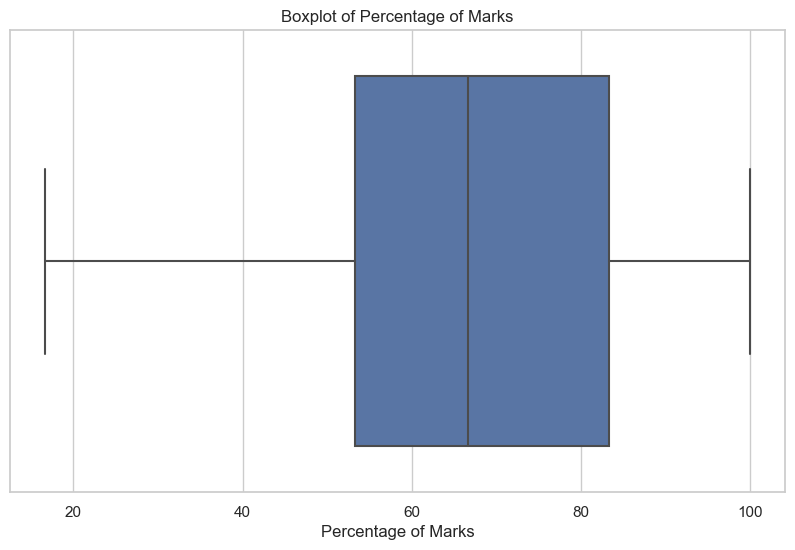

In [9]:
# Create histograms and boxplots for the distribution of 'Best of 2 Total(60)' scores and percentages

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Histogram for 'Best of 2 Total(60)'
plt.figure(figsize=(10, 6))
sns.histplot(modified_student_data['Best of 2 Total(60)'], bins=10, kde=True)
plt.title('Distribution of Best of 2 Total(60)')
plt.xlabel('Best of 2 Total(60)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Best of 2 Total(60)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=modified_student_data['Best of 2 Total(60)'])
plt.title('Boxplot of Best of 2 Total(60)')
plt.xlabel('Best of 2 Total(60)')
plt.show()

# Histogram for 'Percentage of Marks'
plt.figure(figsize=(10, 6))
sns.histplot(modified_student_data['Percentage\n of Marks'], bins=10, kde=True)
plt.title('Distribution of Percentage of Marks')
plt.xlabel('Percentage of Marks')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Percentage of Marks'
plt.figure(figsize=(10, 6))
sns.boxplot(x=modified_student_data['Percentage\n of Marks'])
plt.title('Boxplot of Percentage of Marks')
plt.xlabel('Percentage of Marks')
plt.show()

1. Grade Distribution Histogram:

    - The histogram showed a fairly even distribution of grades, with a slight increase in frequency toward the higher grades.
    - There was no evident skewness, suggesting that grades were not biased toward higher or lower scores.
    - The peak of the distribution was around the 70-80 grade range, indicating that most students achieved grades within this bracket.


2. Grade Distribution Boxplot:

    - The boxplot for grades showed that the median was around the 40 mark out of 60.
    - There was a relatively small interquartile range, indicating that the middle 50% of the grades were concentrated within a narrow band.
    - The distribution of grades did not show significant outliers, and the whiskers extended close to the full range of possible grades, suggesting overall consistent performance among students.


3. Percentage of Marks Distribution Histogram:

    - This histogram indicated a left skewness, with the tail extending towards lower percentages and a peak at higher percentages around 80%.
    - The distribution suggested that while the majority of students scored higher marks, a smaller number of students scored significantly lower, creating the tail in the distribution.


4. Percentage of Marks Boxplot:

    - The median percentage of marks was just above 60%, with an interquartile range from approximately 40% to 80%.
    - The data range was wide, extending from about 20% to 100%, showing a diversity in student performance.
    - There were no outliers, which implies that all students' marks were within the expected range, and no student had an unusually low or high score compared to their peers.

Overall, from the histograms and boxplots, we can infer a generally good performance among students, with most scoring in the higher ranges. There is a small group of students scoring lower, as indicated by the skewness in the histogram of percentage of marks. The grades and percentages seem to be fairly consistent, with no extreme outliers. The boxplots further reinforce that the majority of students are scoring around the median with a typical range of scores.